# Video Game Sales

## Dataset description

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include:

    Rank - Ranking of overall sales

    Name - The games name

    Platform - Platform of the games release (i.e. PC,PS4, etc.)

    Year - Year of the game's release

    Genre - Genre of the game

    Publisher - Publisher of the game

    NA_Sales - Sales in North America (in millions)

    EU_Sales - Sales in Europe (in millions)

    JP_Sales - Sales in Japan (in millions)

    Other_Sales - Sales in the rest of the world (in millions)

    Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.

It is based on BeautifulSoup using Python.

There are 16,598 records. 2 records were dropped due to incomplete information.

Dataset taken from: https://www.kaggle.com/gregorut/videogamesales

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

In [3]:
df = pd.read_csv('vgsales.csv')
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
#Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
#Shape of the dataframe
df.shape

(16598, 11)

In [6]:
#Checking for Null values in the dataset
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

- **Look like the columns Year and Publisher have some nulls.**

In [7]:
#Descriptive statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


## Data Cleaning

Let's check the value count of the Year column.

In [8]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

- **Since there are only 3 records from 2017 and only 1 record from 2020, we'll remove those records as they are not correct representation for those 2 years.**

- **And also we need to remove the null values.**

In [9]:
#Here we filter our dataset, selecting only the non-null values and every year except 2017 & 2020.
vgs = df[(df.Year.notnull()) & (df.Year!=2017) & (df.Year!=2020) & (df.Publisher.notnull())]
vgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16287 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16287 non-null  int64  
 1   Name          16287 non-null  object 
 2   Platform      16287 non-null  object 
 3   Year          16287 non-null  float64
 4   Genre         16287 non-null  object 
 5   Publisher     16287 non-null  object 
 6   NA_Sales      16287 non-null  float64
 7   EU_Sales      16287 non-null  float64
 8   JP_Sales      16287 non-null  float64
 9   Other_Sales   16287 non-null  float64
 10  Global_Sales  16287 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
vgs.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
#Convert dtype of the column Year from float to int
vgs.Year = vgs.Year.astype('int')

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
#vgs.to_csv('vgsales_cleaned.csv')

## Exploratory Data Analysis

Now our dataset consists of games from 1980 to 2016. Let's explore it visually.

### What genre games have been made the most?

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


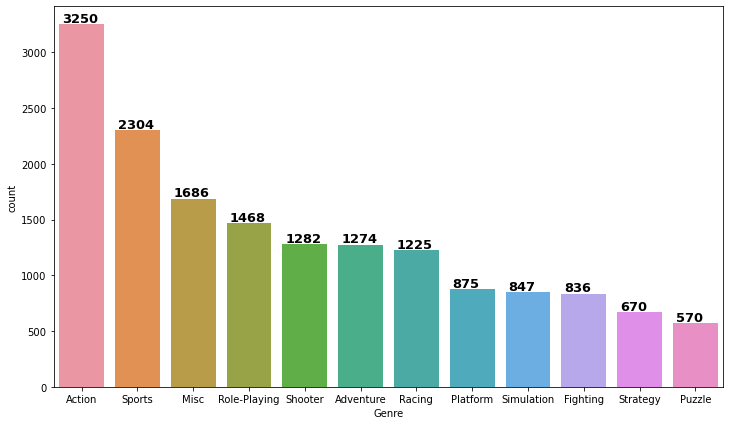

In [11]:
plt.figure(figsize=(12,7))
ax = sns.countplot('Genre', data=vgs, order = vgs.Genre.value_counts().index)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1)), (x + 0.05, y + height + 20), fontsize=13, color='black', weight='bold')

- **So we can see that Action games are made the most, followed Sports and Miscellaneous.**

### Which platform had the most games release?

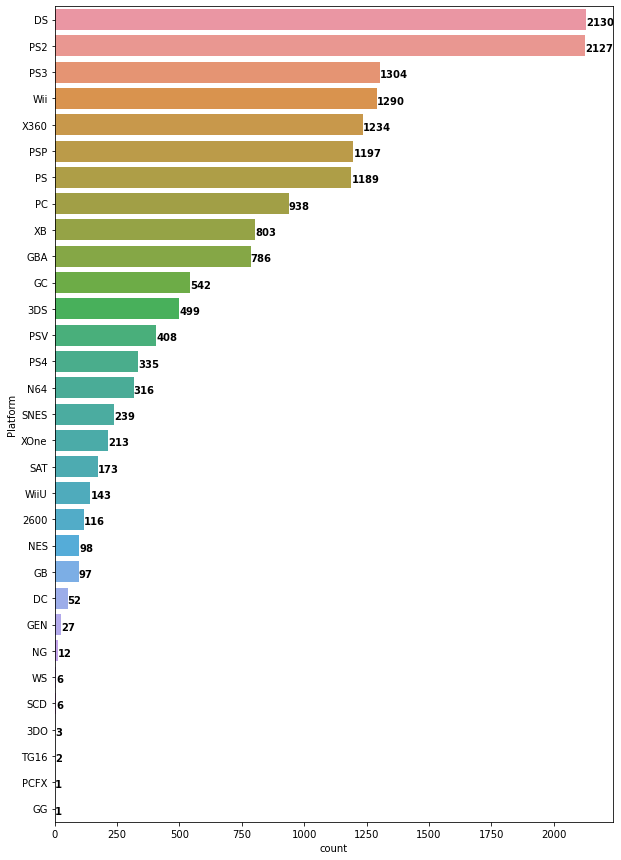

In [12]:
plt.figure(figsize=(10,15))
ax = sns.countplot(y='Platform', data=vgs, order = vgs.Platform.value_counts().index)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(width, 1)), (x + width, y + height - 0.2), fontsize=10, color='black', weight='bold')

- **Nintendo DS had the most games, closely followed by PS2 and then PS3**

###  Which publisher had the most games published?

In [13]:
#Number of Publishers
vgs.Publisher.nunique()

576

Since there are 576 Publishers, let's look at only the top 20.

In [14]:
top_20_publisher = pd.DataFrame(vgs.Publisher.value_counts().head(20)\
                                .reset_index(name='count'))\
                                .rename(columns={'index':'Publisher'})

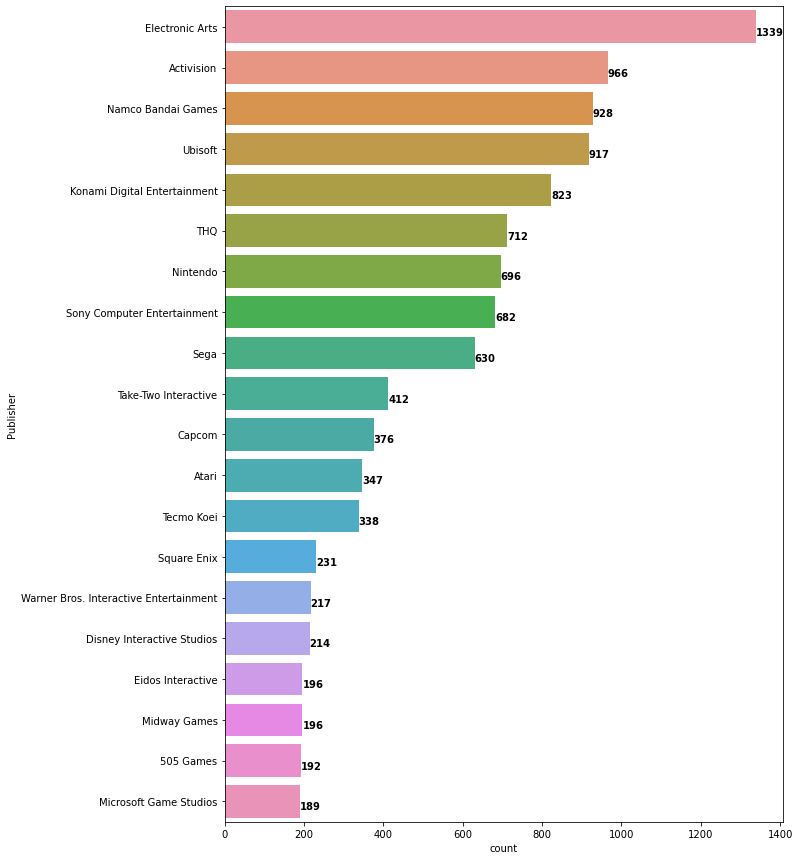

In [15]:
plt.figure(figsize=(10,15))
ax = sns.barplot(x='count', y='Publisher', data=top_20_publisher)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(width)), (x + width, y + height - 0.2), fontsize=10, color='black', weight='bold')

- **Electronic Arts published the most number of games.**

### Which year had the most games released?

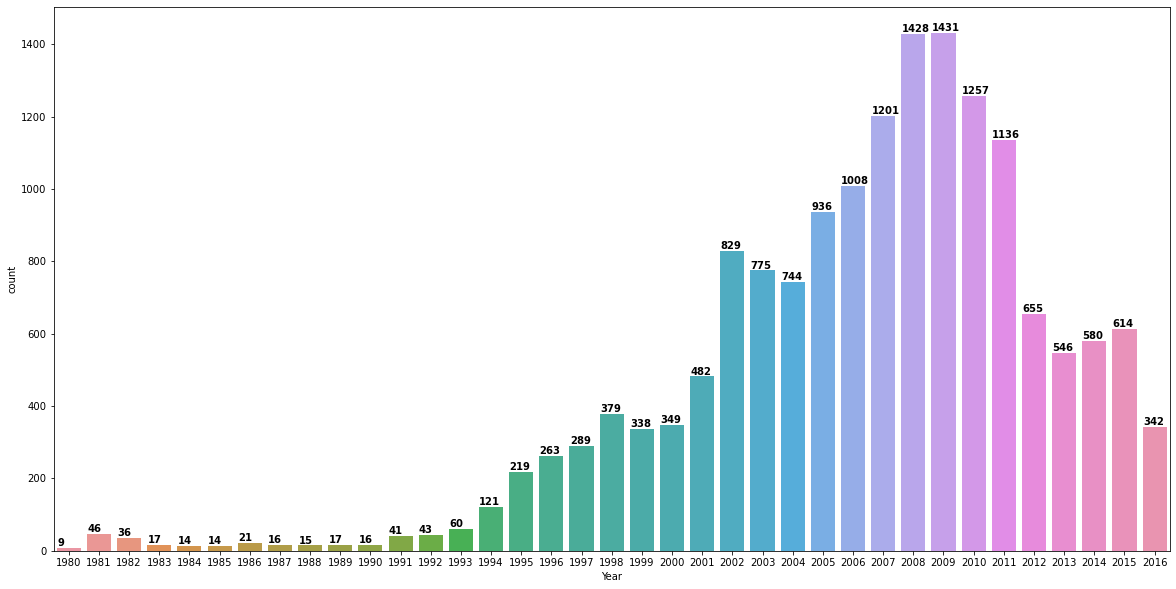

In [39]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Year', data=vgs)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height)), (x + 0.01, y + height + 5), fontsize=10, color='black', weight='bold')

- **The year 2009 saw the most games release closely followed by 2008.**

### Global Sales by Platform:

In [17]:
sales_by_platform = vgs.groupby('Platform')['Global_Sales'].sum().reset_index(name='Sales')\
                                                           .sort_values('Sales', ascending=False, ignore_index=True)

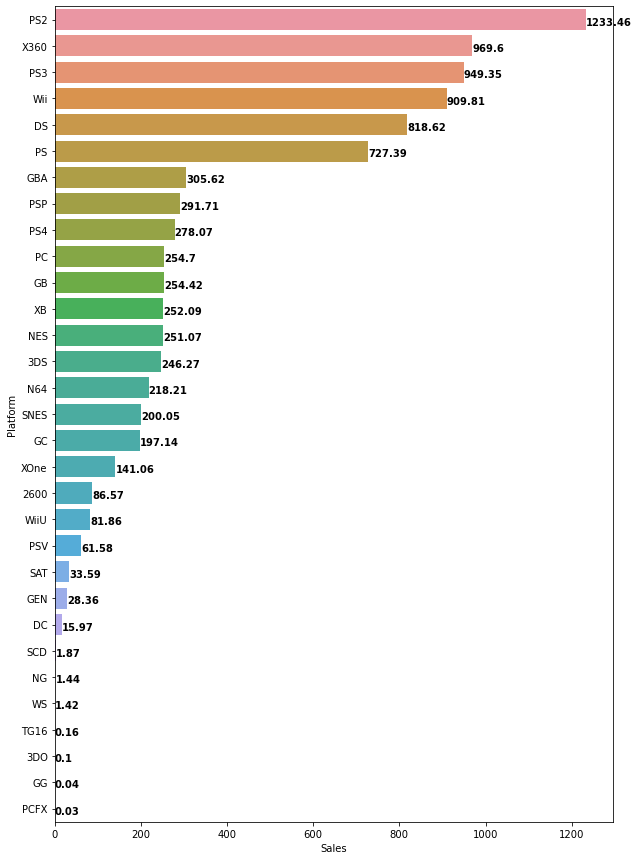

In [18]:
plt.figure(figsize=(10,15))
ax = sns.barplot(x='Sales', y='Platform', data=sales_by_platform)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(width, 2)), (x + width, y + height - 0.2), fontsize=10, color='black', weight='bold')

- **PS2 had the highest Global Sales (1233 million).**

### Global Sales by Year:

In [19]:
sales_by_year = vgs.groupby('Year')['Global_Sales'].sum().reset_index(name='Sales')

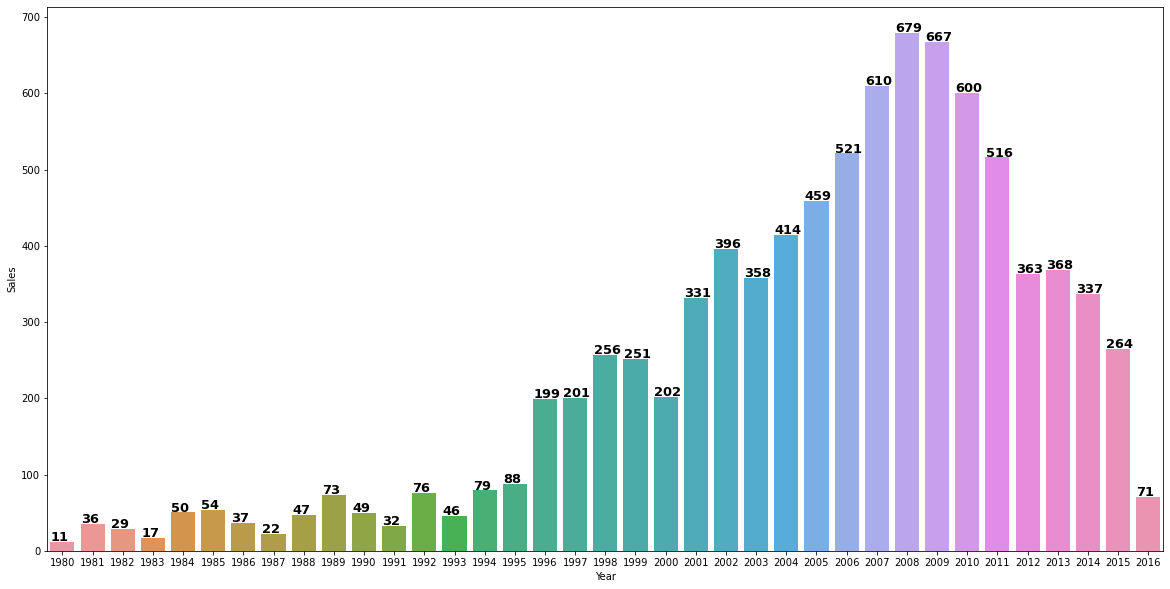

In [20]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Year', y='Sales', data=sales_by_year)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height)), (x + 0.01, y + height + 1), fontsize=13, color='black', weight='bold')

- **The year 2008 had the highest sales globally (679 million), closely followed by 2009 (667 millions).**

### Global Sales by Genre:

In [21]:
sales_by_genre = vgs.groupby('Genre')['Global_Sales'].sum().reset_index(name='Sales')\
                                                           .sort_values('Sales', ascending=False, ignore_index=True)

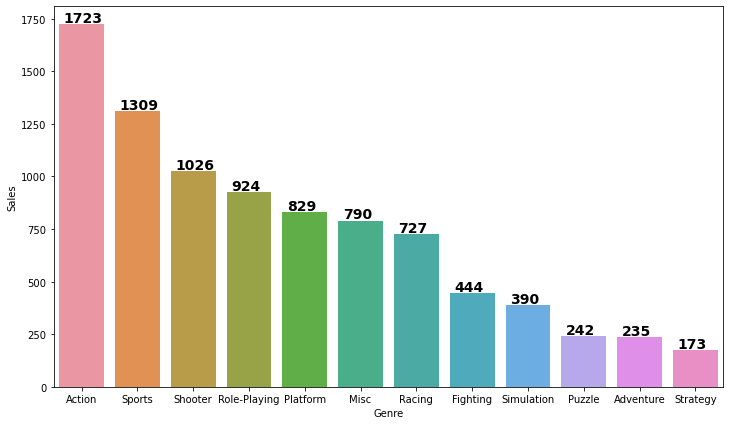

In [23]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x='Genre', y='Sales', data=sales_by_genre)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height)), (x + 0.08, y + height + 10), fontsize=14, color='black', weight='bold')

- **Action games had sales of 1723 million globally. Sports games comes in second (1309 million) and Shooter games in third (1026 million).**

### Global Sales by Publisher:

In [42]:
sales_by_publisher = vgs.groupby('Publisher')['Global_Sales'].sum()\
                        .reset_index(name='Sales')\
                        .sort_values('Sales', ascending=False, ignore_index=True).iloc[:20]

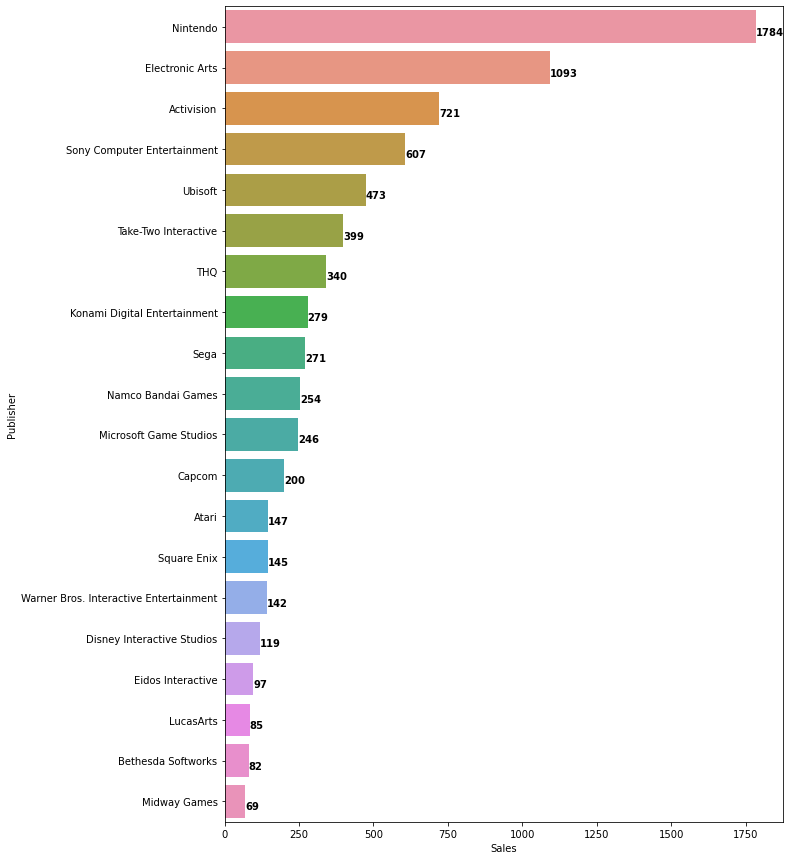

In [47]:
plt.figure(figsize=(10,15))
ax = sns.barplot(x='Sales', y='Publisher', data=sales_by_publisher)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(width)), (x + width, y + height - 0.2), fontsize=10, color='black', weight='bold')

- **Nintendo had the most sales (1784 million) followed by Electronic Arts(1093 million) and Activision(721 million).**

### Sales by Genre in different regions:

Let's see what are sales of each genre in different regions of the world.

In [54]:
vgs.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum().reset_index()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,861.77,516.48,158.64,184.92,1722.83
1,Adventure,101.93,63.74,51.99,16.70,234.59
2,Fighting,220.74,100.00,87.15,36.19,444.05
3,Misc,396.92,211.77,106.67,73.92,789.87
4,Platform,445.99,200.65,130.65,51.51,829.13
5,Puzzle,122.01,50.52,56.68,12.47,242.21
6,Racing,356.93,236.31,56.61,76.68,726.76
7,Role-Playing,326.50,187.57,350.25,59.38,923.79
8,Shooter,575.16,310.45,38.18,101.90,1026.20
9,Simulation,181.51,113.02,63.54,31.34,389.69


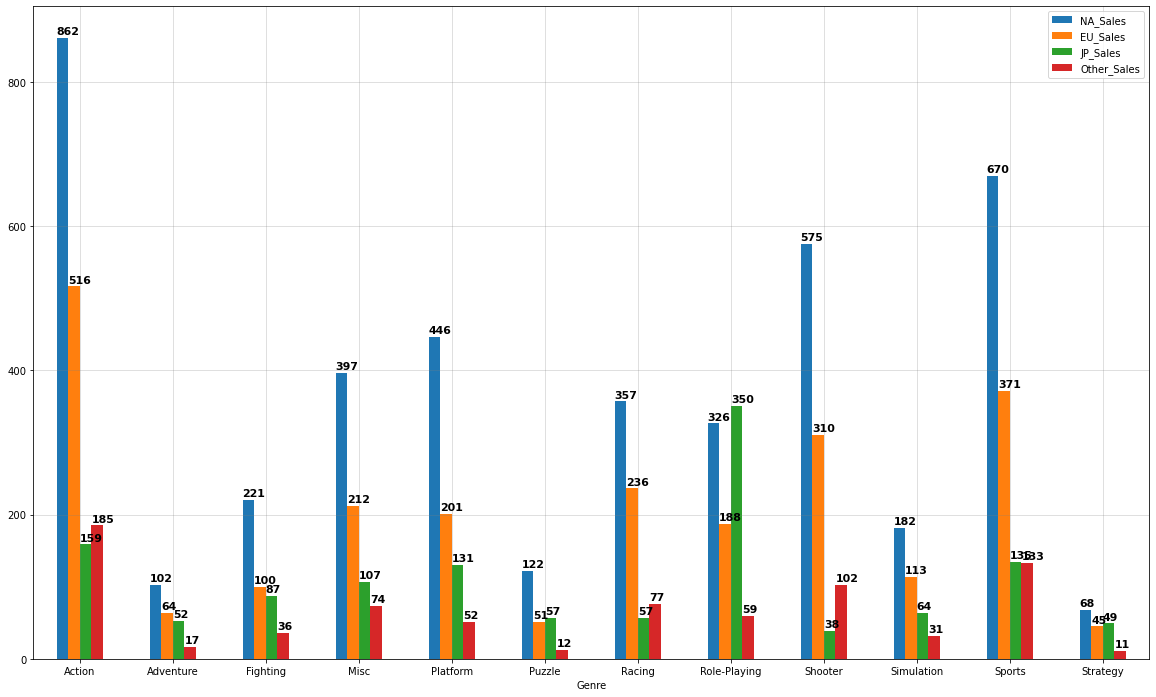

In [124]:
ax = vgs.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum().plot.bar(figsize=(20,12), rot=0)

ax.grid(b = True, color ='grey', linestyle ='-', linewidth = 0.5, alpha = 0.5)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height)), (x, y + height + 5), fontsize=11, color='black', weight='bold')

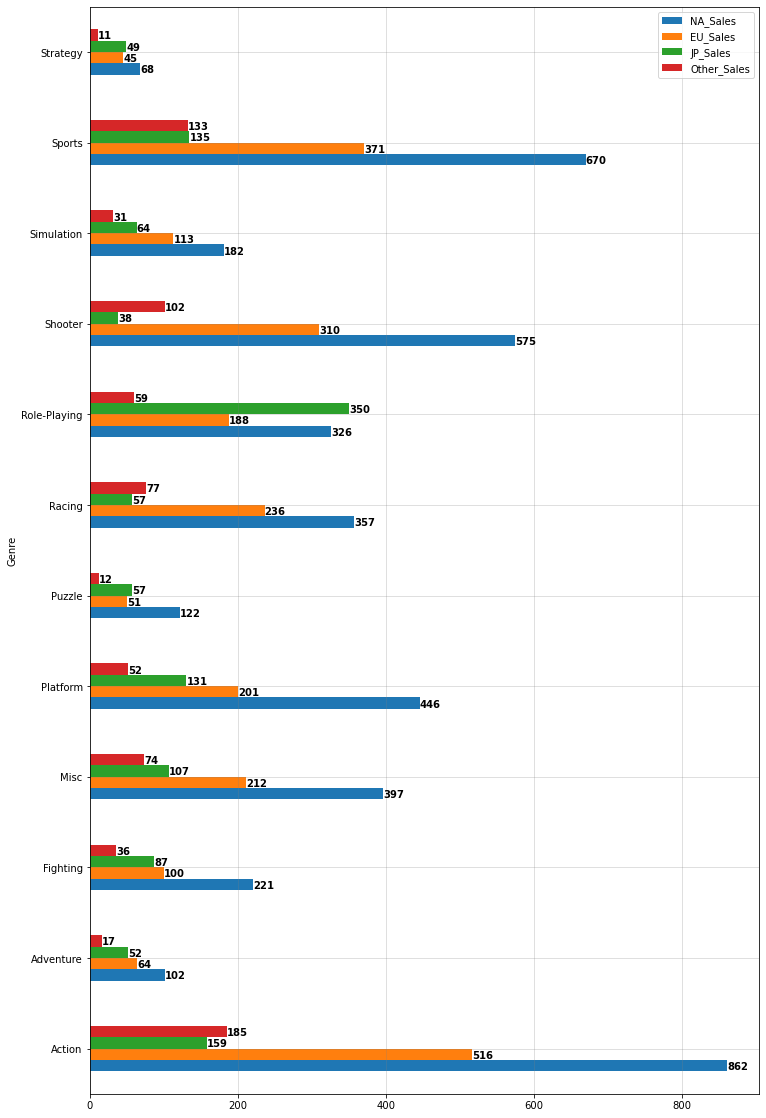

In [106]:
ax = vgs.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum().plot.barh(figsize=(12,20), rot=0)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-', linewidth = 0.5,
        alpha = 0.5)

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.02,
             str(round((i.get_width()))),
             fontsize = 10, fontweight ='bold',
             color ='black')

- **We can see that sales in North America are high for every genre except role-playing games, whose sales are the highest in Japan.**

In [24]:
vgs.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
